## 8.2 Autoencoder 구현하기

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot = True)

C:\Users\soual\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

In [2]:
learning_rate = 0.01
training_epoch = 20
batch_size = 100
n_hidden = 256
n_input = 28*28

hyperparameter로 사용할 옵션들을 따로 빼내어 구조화

- learning_rate : optimization 함수에서 사용할 학습률

- training_epoch : 전체 데이터를 학습할 총 횟수

- batch_size : minibatch로 한번에 학습할 데이터(이미지) 갯수

- n_hidden : hidden layer의 뉴런 갯수

- n_input :  input data의 크기 -> mnist의 이미지 크기 = 28X28 = 784

In [3]:
X = tf.placeholder(tf.float32, [None, n_input])

**이 모델은 unsuperviesed learning 이므로 Y값 없음**

In [4]:
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))

encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode))

### Encoder 

1. n_hidden 개의 뉴런을 가진 hidden layer를 만듦

2. weight와 bias variable을 뉴런의 갯수만큼 설정

3. variable과 input data를 곱하고 더한 뒤 (wx+b) sigmoid 함수 적용

**n_input보다 n_hidden이 더 작음**

-> 입력값을 압축하고 noise 제거 -> 입력값의 특징을 찾아냄

In [5]:
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))

decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_decode), b_decode))

### Decoder

encoder와 같은 구성!

input 값 = n_hidden

출력값 = n_input

위와 같이 구성하면 1개의 hidden layer를 가진 model이 구성됨

In [6]:
cost = tf.reduce_mean(tf.pow(X-decoder, 2))

weight를 optimize 하기 위해 cost function 만듦

-> 기본적인 autoencoder의 목적은 출력값을 입력값과 가장 비슷하게 만드는 것!

=> 압축된 hidden layer의 neuron들을 통해 input의 특징을 알아낼 수 있음

- 입력값인 X를 평가를 위한 실측값으로 사용

- decoder가 내보낸 결과값의 차이를 손실값으로 설정

=> 이 값의 차이는 거리함수로! 

In [7]:
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

In [9]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(training_epoch):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict = {X: batch_xs})
        
        total_cost += cost_val
        
    print('Epoch: ', '%04d' % (epoch + 1), 'Avg. cost =', '{:.4f}'.format(total_cost / total_batch))
    
print('최적화 완료!')

Epoch:  0001 Ava. cost = 0.1998
Epoch:  0002 Ava. cost = 0.0633
Epoch:  0003 Ava. cost = 0.0518
Epoch:  0004 Ava. cost = 0.0446
Epoch:  0005 Ava. cost = 0.0404
Epoch:  0006 Ava. cost = 0.0387
Epoch:  0007 Ava. cost = 0.0374
Epoch:  0008 Ava. cost = 0.0364
Epoch:  0009 Ava. cost = 0.0354
Epoch:  0010 Ava. cost = 0.0350
Epoch:  0011 Ava. cost = 0.0348
Epoch:  0012 Ava. cost = 0.0341
Epoch:  0013 Ava. cost = 0.0325
Epoch:  0014 Ava. cost = 0.0321
Epoch:  0015 Ava. cost = 0.0317
Epoch:  0016 Ava. cost = 0.0311
Epoch:  0017 Ava. cost = 0.0309
Epoch:  0018 Ava. cost = 0.0308
Epoch:  0019 Ava. cost = 0.0307
Epoch:  0020 Ava. cost = 0.0294
최적화 완료!


In [10]:
sample_size = 10

samples = sess.run(decoder, feed_dict = {X: mnist.test.images[:sample_size]})

결과값을 정확도가 아닌 decoder로 생성해낸 결과를 직관적인 방법으로 확인!

10개의 test data를 가져와 decoder를 이용해 출력값으로 만듦

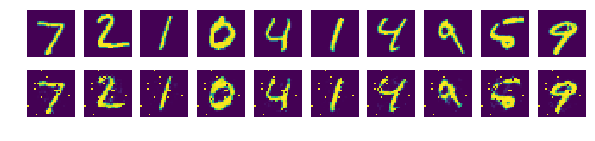

In [12]:
fig, ax = plt.subplots(2, sample_size, figsize = (sample_size,2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28,28)))
    ax[1][i].imshow(np.reshape(samples[i],(28,28)))
    
plt.show()